# Bachelor project: Swarm data
This use panda and my new fuctions to plot the data and half orbit means

In [13]:
%matplotlib notebook
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
os.chdir('/home/simon/Desktop/Bachelor_project/code')
import My_functions as my
days = 31

Load the data PANDA

In [2]:
FAC = my.load_FAC('A',days)
DNS = my.load_DNS(days)
ap = my.load_ap(days)
FAC = FAC.dropna(how='any')
DNS = DNS.dropna(how='any')
my.add_orbit(FAC)
my.add_orbit(DNS)

ERROR	Unable to unzip file /home/simon/Desktop/Bachelor_project/data/SW_OPER_FACATMS_2F_20150305T000000_20150305T235959_0205.ZIP to location /tmp/swarmtoolkit_bc5o_2kj
	Ensure that the files and locations are valid and that the file is not corrupted


SW_OPER_FACATMS_2F_20150305T000000_20150305T235959_0205.ZIP Was not found


## The intial data
The structure of FAC and DNS is

In [9]:
FAC.head(3)

,Latitude,Longitude,Radius,IRC,IRC_Error,FAC,FAC_Error,Flags,Flags_F,Flags_B,Flags_q,Orbit_nr,Hemisphere
2015-03-01 00:00:00.500,85.872899,96.889383,6823984.24,-0.420756,-0.005832,0.420976,0.005835,0.0,2.0,0.0,0.0,0.0,1.0
2015-03-01 00:00:01.500,85.823529,97.451080,6823985.69,0.062883,0.066713,-0.062915,0.066748,0.0,2.0,0.0,0.0,0.0,1.0
2015-03-01 00:00:02.500,85.773762,97.999525,6823987.16,-0.036682,0.051779,0.036701,0.051805,0.0,2.0,0.0,0.0,0.0,1.0


In [10]:
DNS.head(3)

,Altitude,Latitude,Longitude,Local_solar_time,Density,Orbit_nr,Hemisphere
2015-03-01 00:00:10,467092.145535,85.117592,105.579979,6.833068,8.285023e-13,0.0,1.0
2015-03-01 00:00:20,467073.571848,84.569942,109.177030,7.075650,8.265684e-13,0.0,1.0
2015-03-01 00:00:30,467051.715982,84.004519,112.099728,7.273275,8.293079e-13,0.0,1.0


Plot the intial data

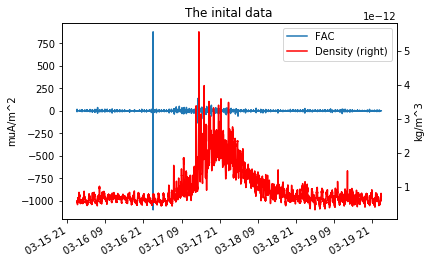

In [23]:
plt.figure()

p1 = FAC.FAC['20150316':'20150319'].plot(legend=True)
p2 = DNS.Density['20150316':'20150319'].plot(secondary_y=True, style='r',legend=True)
p1.set_ylabel('muA/m^2')
p1.right_ax.set_ylabel('kg/m^3')
plt.title('The inital data')
plt.show()

## Half orbit means
Filter the FAC before mean

In [8]:
FAC_filter = FAC.loc[abs(FAC.FAC_Error)<40]

Calculate the half orbit means

In [5]:
FAC_mean=my.orbit_means(FAC_filter)
DNS_mean=my.orbit_means(DNS)

The structure of half orbit means are the same for FAC and DNS

In [12]:
FAC_mean.head(3)

,FAC,Orbit_nr,Hemisphere,Count,Delta_time
2015-03-01 00:43:29.500,0.394035,0.0,-1.0,2297.0,2296.0
2015-03-01 01:31:30.500,0.327109,1.0,1.0,2331.0,2330.0
2015-03-01 02:16:53.500,0.424904,1.0,-1.0,2275.0,2274.0


Remove all half orbits with times that diviates more than 6 min

In [6]:
FAC_mean=FAC_mean.loc[abs(FAC_mean.Delta_time-FAC_mean.Delta_time.median())<360]
DNS_mean=DNS_mean.loc[abs(DNS_mean.Delta_time-DNS_mean.Delta_time.median())<360]

Plot the results

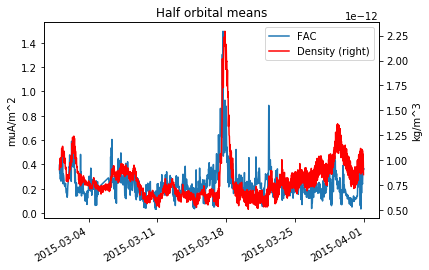

In [22]:
plt.figure()

p1 = FAC_mean.FAC.plot(legend=True)
p2 = DNS_mean.Density.plot(secondary_y=True, style='r',legend=True)
p1.set_ylabel('muA/m^2')
p1.right_ax.set_ylabel('kg/m^3')
plt.title('Half orbital means')
plt.show()